### 성적데이터 생성

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = pd.DataFrame({
    '시간': [2, 4, 8, 9],
    '성적': [20, 40, 80, 90]
})
data

,시간,성적
0,2,20
1,4,40
2,8,80
3,9,90


#### w와 b를 찾는 방법
- 최소제곱법: 수학적 공식을 이용한 해석적 방법
- 경사하강법: w와 b값의 변화에 따른 오차값의 기울기를 이용하여 찾는 방법

최소제곱법이 적용된 sklean 모델 사용해보기

In [10]:
from sklearn.linear_model import LinearRegression

In [12]:
# 모델 생성
lr_rg = LinearRegression() # 하이퍼파라미터 없음

In [16]:
# 학습
lr_rg.fit(data[['시간']], data[['성적']])

LinearRegression()

In [20]:
# 예측
lr_rg.predict([[7]])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[70.]])

In [24]:
# 가중치(w), 절편(b) 확인
lr_rg.coef_ # 가중치

array([[10.]])

In [26]:
lr_rg.intercept_

array([7.10542736e-15])

### 경사하강법(Gradiant Descent)
1. 파라미터(w, b) 초기화: 임의의 값으로
2. 예측: 현재 w와 b를 사용해서 예측을 수행
3. 오차 계산: 예측값과 실제값 사이의 오차 계산 -> MSE
4. 비용함수의 기울기 계산: 오차값이 낮아지는 방향을 찾기 위해서, w와 mse간의 기울기 값을 계산
5. 파라미터 업데이트: 기울기와 학습률을 사용해서 업데이트

In [30]:
# 가설함수 정의
# 예측값
def h(w, x):
    return w * x + 0

In [35]:
# MSE(평균제곱오차 -> 오차 제곱의 평균): 손실함수, 비용함수
def cost(data, target, weight): # 특성(시간), 실제값(실제 성적), 가중치
    y_pred = h(weight, data)
    mse = ((target - y_pred) ** 2).mean()
    return mse

In [41]:
# MSE
cost(data['시간'], data['성적'], 10)

0.0

- w값에 따른 mse 변화율 그려보기

In [46]:
# x축의 범위
w_arr = range(-10, 31) # -10 ~ 30

In [48]:
cost_list = [] # 비용함수의 MSE를 담아줄 빈 리스트
for w in w_arr:
    c = cost(data['시간'], data['성적'], w)
    cost_list.append(c)

In [50]:
cost_list

[16500.0,
 14891.25,
 13365.0,
 11921.25,
 10560.0,
 9281.25,
 8085.0,
 6971.25,
 5940.0,
 4991.25,
 4125.0,
 3341.25,
 2640.0,
 2021.25,
 1485.0,
 1031.25,
 660.0,
 371.25,
 165.0,
 41.25,
 0.0,
 41.25,
 165.0,
 371.25,
 660.0,
 1031.25,
 1485.0,
 2021.25,
 2640.0,
 3341.25,
 4125.0,
 4991.25,
 5940.0,
 6971.25,
 8085.0,
 9281.25,
 10560.0,
 11921.25,
 13365.0,
 14891.25,
 16500.0]

<function matplotlib.pyplot.show(close=None, block=None)>

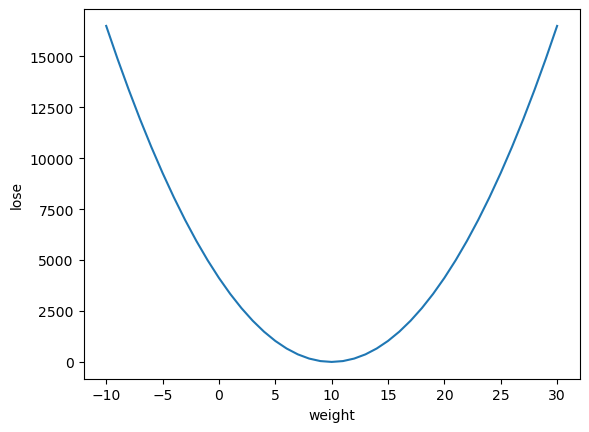

In [52]:
plt.plot(w_arr, cost_list)
plt.xlabel('weight')
plt.ylabel('lose')

plt.show

In [54]:
# 경사하강법이 적용된 모델
from sklearn.linear_model import SGDRegressor

In [56]:
# 모델 초기화(생성)
sgd_rg = SGDRegressor(
    eta0 = 0.01, # 학습률(기울기의 보폭)
    max_iter=5000, # x값을 업데이트하는 횟수 최대 5000번까지 수행
    verbose = 1 # 학습 진행 현황 출력
)

In [58]:
# 학습
sgd_rg.fit(data[['시간']], data[['성적']])

-- Epoch 1
Norm: 8.17, NNZs: 1, Bias: 1.261105, T: 4, Avg. loss: 999.488998
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 9.37, NNZs: 1, Bias: 1.436658, T: 8, Avg. loss: 31.095164
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 9.67, NNZs: 1, Bias: 1.473184, T: 12, Avg. loss: 2.542369
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 9.76, NNZs: 1, Bias: 1.480341, T: 16, Avg. loss: 0.441904
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 9.79, NNZs: 1, Bias: 1.478514, T: 20, Avg. loss: 0.255354
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 9.80, NNZs: 1, Bias: 1.474741, T: 24, Avg. loss: 0.230906
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 9.81, NNZs: 1, Bias: 1.469803, T: 28, Avg. loss: 0.230174
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 9.81, NNZs: 1, Bias: 1.465122, T: 32, Avg. loss: 0.226308
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 9.81, NNZs: 1, Bias: 1.460114, T: 36, Avg. loss: 0.226601
Total training time: 0.00 seconds.
-- Epoch 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(max_iter=5000, verbose=1)

In [60]:
# 가중치와 절편 확인
sgd_rg.coef_, sgd_rg.intercept_

(array([9.8343665]), array([1.22987217]))

In [64]:
# 성능 확인
sgd_rg.score(data[['시간']], data[['성적']])
# 회귀 평가 지표(오차값, 데이터의 분포를 잘 이해하고 있는가?)
# 분류 평가 지표(얼마나 잘 맞췄는가?)

0.9996316158697842